In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap

In [3]:
shap.initjs()

In [4]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
df.shape

(1048575, 21)

In [6]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

# Column Definitions
* **USMER** : This indicates whether the patient treated medical units of the first, second or third level
* **MEDICAL_UNIT** : The type of institution of the Natinal Health System that provided the care.
* **SEX** : 1-"Female", 2-"male".
* **PATIENT_TYPE** : The type of care the patient received in the unit. 1-**"returned home"**, 2-**"hospitalization"**. **97** and **99** are missing data.
* **DATE_DIED** : Indicated date of death means that the patient died, except for **9999-99-99** which means that the patient survived..
* **INTUBED** : Wether the patient was connected to a ventilator. 1-**"yes"**, 2-**"no"**
* **PNEUMONIA** : Whether the patient already have air sacs inflamation or not.1-**"yes"**, 2-**"no"**, while **97** and **99** are missing data.
* **AGE**: The patient's age. 
* **PREGNANT**: Whether the patient is pregnant or not.1-**"yes"**, 2-**"no"**, while **97** and **99** are missing data.
* **DIABETES** : Whether the patient has diabetes or not.
* **COPD** : Whether the patient has chronic obstructive pulmonary disease or not.
* **ASTHMA** : Whether the patient has asthma or not.
* **INMSUPR** : Whether the patient is immunosuppressed or not.
* **HYPERTENSION** : Whether the patient has hypertension or not.
* **OTHER DISEASE** : Whether the patient has other disease or not.
* **CARDIOVASCULAR** : Whether the patient has patient has heart or blood vessels related diseases.
* **OBESITY** : Whether the patient is obessed or not.
* **RENAL CHRONIC** : Whether the patient has chronic renal disease or not.
* **TOBACCO** : Whether the patient is a tobacco user or not.
* **CLASIFFICATION_FINAL** : Covid test findings. Values 1-3 means that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* **ICU** : Whether the patient has been admitted into the intensive care unit.

## Changing the Column names from Upper case to lower case.

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

## Removing Missing Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [9]:
df.nunique()

usmer                     2
medical_unit             13
sex                       2
patient_type              2
date_died               401
intubed                   4
pneumonia                 3
age                     121
pregnant                  4
diabetes                  3
copd                      3
asthma                    3
inmsupr                   3
hipertension              3
other_disease             3
cardiovascular            3
obesity                   3
renal_chronic             3
tobacco                   3
clasiffication_final      7
icu                       4
dtype: int64

# The following columns (14 of them) of the data needs to be examined in order to remove missing values from them:
* **intubed**
* **pneumonia**
* **pregnant**
* **diabetes**
* **copd**
* **asthma**
* **inmsupr**
* **hypertension**
* **other disease**
* **cardivascular**
* **obesity**
* **renal_chronic**
* **tobacco**
* **icu**

**Notice that these columns contains more than 2 unique values indicating yes or no.**

In [10]:
missing_value_columns = [col for col in df.columns if len(df[col].unique()) >2 and len(df[col].unique())<=4]
missing_value_columns

['intubed',
 'pneumonia',
 'pregnant',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'icu']

In [11]:
len(df[df["intubed"]>=97])

855869

## 1. "intubed"
Wether the patient was connected to a ventilator. 1-"yes", 2-"no"

Text(0.5, 1.0, 'intubed value counts')

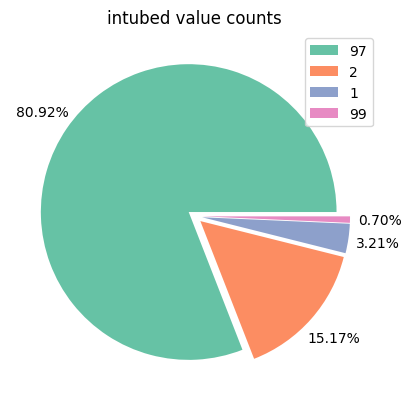

In [12]:
colors = sns.color_palette("Set2")[0:4]
plt.pie(df['intubed'].value_counts().values, colors=colors, explode=[0.05]*4, pctdistance=1.2, autopct='%.2f%%')
plt.legend(df['intubed'].value_counts().index)
plt.title(f"intubed value counts")

We will be dropping the "inclubed" column as above 81% of the record contains missing data. 

In [13]:
df.drop("intubed", axis=1, inplace=True)
df.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


## 2. "pneumonia"

Text(0.5, 1.0, 'pneumonia value counts')

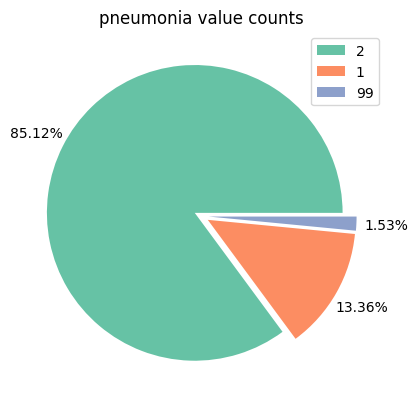

In [14]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['pneumonia'].value_counts().values, colors=colors, explode=[0.05]*3, pctdistance=1.2, autopct='%.2f%%')
plt.legend(df['pneumonia'].value_counts().index)
plt.title(f"pneumonia value counts")

This column is ok, but earlier we will dropping the missing values from this column

In [15]:
df = df[df['pneumonia']<99]
df.shape

(1032572, 20)

## 3. "pregnant"

Text(0.5, 1.0, 'pregnant value counts')

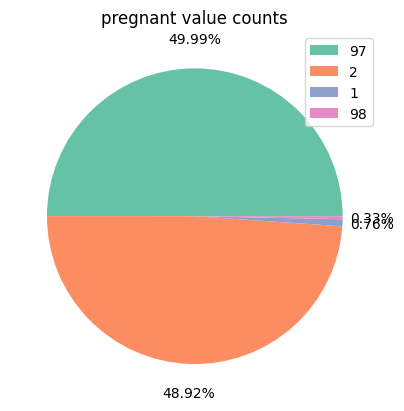

In [16]:
colors = sns.color_palette("Set2")[0:4]
plt.pie(df['pregnant'].value_counts().values, colors=colors, pctdistance=1.2, autopct='%.2f%%')
plt.legend(df['pregnant'].value_counts().index)
plt.title(f"pregnant value counts")

We will be dropping the "pregnant" column as about 50% of the record contains missing data.

In [17]:
df.drop('pregnant', axis=1, inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died',
       'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

## 4. "diabetes"

Text(0.5, 1.0, 'diabetes value counts')

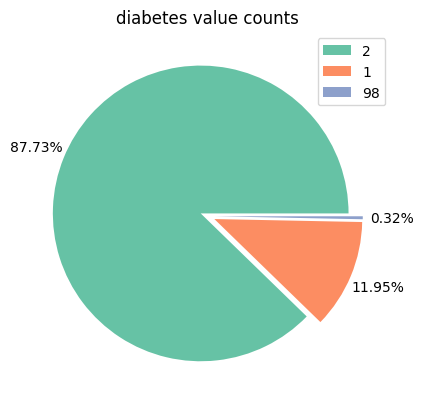

In [18]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['diabetes'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['diabetes'].value_counts().index)
plt.title(f"diabetes value counts")

The column 'diabetes' is ok, but earlier we will dropping the missing values from this column

In [19]:
df = df[df['diabetes']<97]
df.shape

(1029251, 19)

# 5. "copd"
 Whether the patient has chronic obstructive pulmonary disease or not.

Text(0.5, 1.0, 'copd value counts')

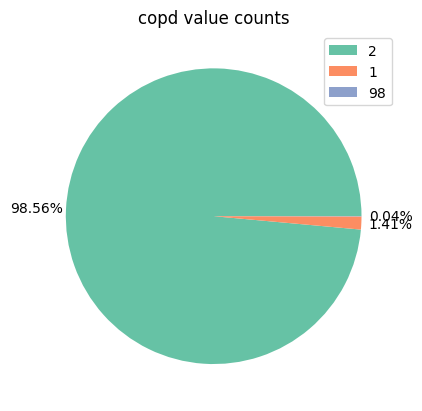

In [20]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['copd'].value_counts().values, colors=colors, pctdistance=1.2, autopct='%.2f%%')
plt.legend(df['copd'].value_counts().index)
plt.title(f"copd value counts")

We will be dropping the missing values from this column

In [21]:
df = df[df['copd']<97]
df.shape

(1028887, 19)

# 6. "asthma"

Text(0.5, 1.0, 'asthma value counts')

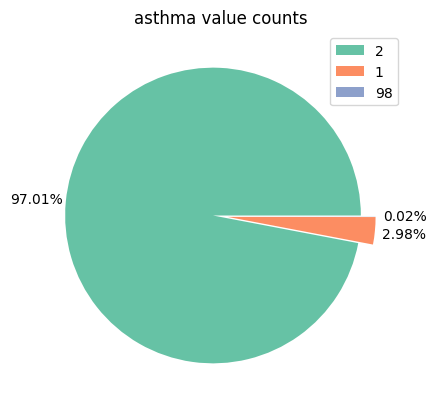

In [22]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['asthma'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['asthma'].value_counts().index)
plt.title(f"asthma value counts")

We will be dropping the missing values from this column

In [23]:
df = df[df['asthma']<97]
df.shape

(1028707, 19)

# 7. "inmsupr"
Whether the patient is immunosuppressed or not.

Text(0.5, 1.0, 'inmsupr value counts')

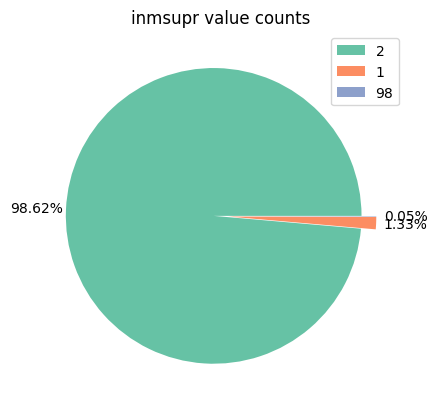

In [24]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['inmsupr'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['inmsupr'].value_counts().index)
plt.title(f"inmsupr value counts")

In [25]:
df = df[df['inmsupr']<97]
df.shape

(1028199, 19)

We will be dropping the missing values from this column

# 8. "hypertension"

Text(0.5, 1.0, 'hypertension value counts')

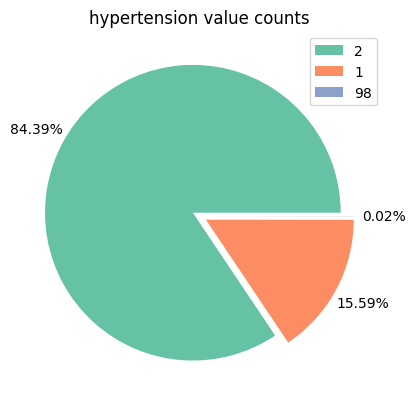

In [26]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['hipertension'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['hipertension'].value_counts().index)
plt.title(f"hypertension value counts")

In [27]:
df = df[df['hipertension']<97]
df.shape

(1027975, 19)

We will be dropping the missing values from this column

# 9. "other_diseases"

Text(0.5, 1.0, 'other_disease value counts')

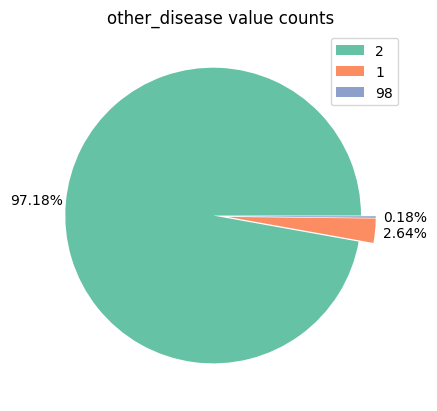

In [28]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['other_disease'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['other_disease'].value_counts().index)
plt.title(f"other_disease value counts")

In [29]:
df = df[df['other_disease']<97]
df.shape

(1026173, 19)

We will be dropping the missing values from this column

# 10. "cardiovascular"

Text(0.5, 1.0, 'cardiovascular value counts')

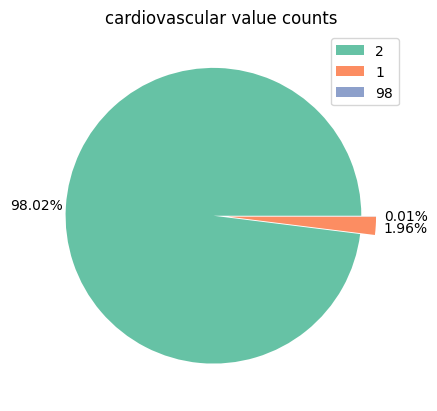

In [30]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['cardiovascular'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['cardiovascular'].value_counts().index)
plt.title(f"cardiovascular value counts")

In [31]:
df = df[df['cardiovascular']<97]
df.shape

(1026040, 19)

We will be dropping the missing values from this column

# 11. "obesity"

Text(0.5, 1.0, 'obesity value counts')

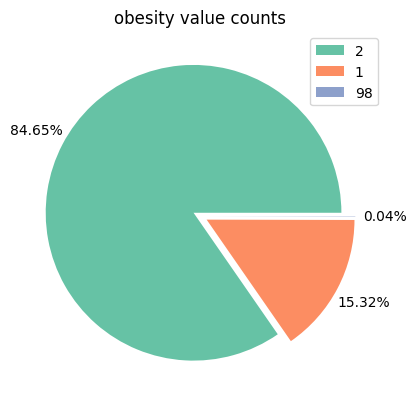

In [32]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['obesity'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['obesity'].value_counts().index)
plt.title(f"obesity value counts")

We will be dropping the missing values from this column

In [33]:
df = df[df['obesity']<97]
df.shape

(1025658, 19)

# 12. "renal_chronic"

Text(0.5, 1.0, 'renal_chronic value counts')

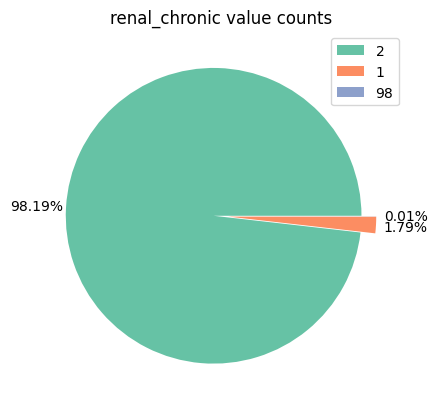

In [34]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['renal_chronic'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['renal_chronic'].value_counts().index)
plt.title(f"renal_chronic value counts")

We will be dropping the missing values from this column

In [35]:
df = df[df['renal_chronic']<97]
df.shape

(1025517, 19)

# 13. "tobacco"

Text(0.5, 1.0, 'tobacco value counts')

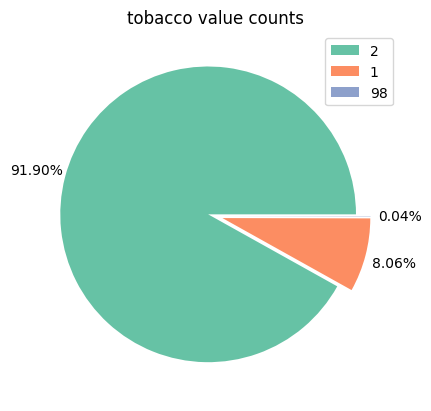

In [36]:
colors = sns.color_palette("Set2")[0:3]
plt.pie(df['tobacco'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*3, autopct='%.2f%%')
plt.legend(df['tobacco'].value_counts().index)
plt.title(f"tobacco value counts")

We will be dropping the missing values from this column

In [37]:
df = df[df['tobacco']<97]
df.shape

(1025152, 19)

# 14. "icu"

Text(0.5, 1.0, 'icu value counts')

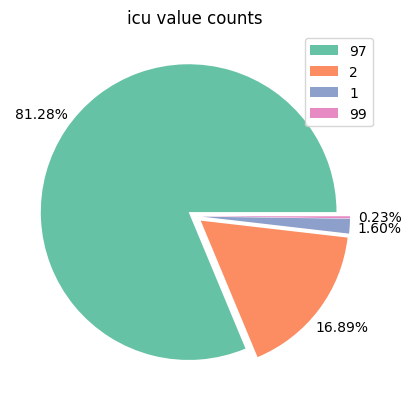

In [38]:
colors = sns.color_palette("Set2")[0:4]
plt.pie(df['icu'].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*4, autopct='%.2f%%')
plt.legend(df['icu'].value_counts().index)
plt.title(f"icu value counts")

We will be dropping the "icu" column as above 80% of the record contains missing data.

In [39]:
df.drop("icu", axis=1, inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died',
       'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final'],
      dtype='object')

In [40]:
df.shape

(1025152, 18)

In [41]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3


In [42]:
after_missing_value_columns = [col for col in df.columns if len(df[col].unique()) == 2 and col != 'death']
after_missing_value_columns

['usmer',
 'sex',
 'patient_type',
 'pneumonia',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco']

In [43]:
'''
for name in after_missing_value_columns:
    colors = sns.color_palette("Set2")[0:len(df[name].value_counts())]
    plt.pie(df[name].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*len(df[name].value_counts()), autopct='%.2f%%')
    plt.legend(df[name].value_counts().index)
    plt.title("{} value counts".format(name))
    plt.savefig(fname='plots_png/{}.png'.format(name), format='png')
    plt.close()
'''

'\nfor name in after_missing_value_columns:\n    colors = sns.color_palette("Set2")[0:len(df[name].value_counts())]\n    plt.pie(df[name].value_counts().values, colors=colors, pctdistance=1.2, explode=[0.05]*len(df[name].value_counts()), autopct=\'%.2f%%\')\n    plt.legend(df[name].value_counts().index)\n    plt.title("{} value counts".format(name))\n    plt.savefig(fname=\'plots_png/{}.png\'.format(name), format=\'png\')\n    plt.close()\n'

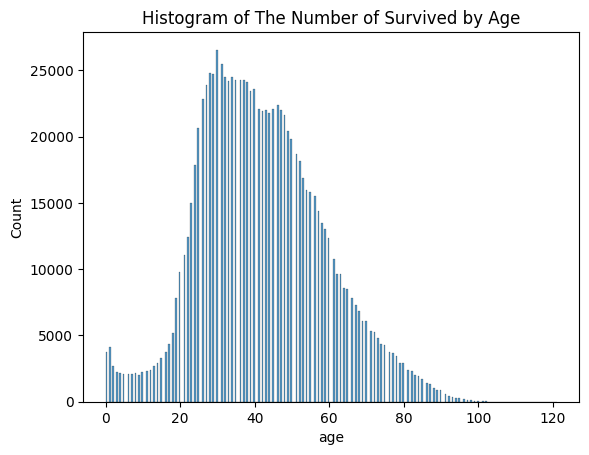

In [44]:
sns.histplot(data=df['age'])
plt.title("Histogram of The Number of Survived by Age")
plt.savefig(fname='plots_png/histogram_survived_age.png', format='png')
plt.show()

In [45]:
#data = df['usmer'].apply(lambda x : for val in df['usmer'].values)
#sns.histplot(data=df[['usmer']])

In [46]:
df['usmer'].values

array([2, 2, 2, ..., 2, 2, 2])

In [47]:
df['date_died'].value_counts()

9999-99-99    950438
06/07/2020       984
07/07/2020       981
13/07/2020       969
16/06/2020       965
               ...  
27/02/2021         1
26/02/2021         1
20/02/2021         1
11/02/2021         1
22/04/2021         1
Name: date_died, Length: 395, dtype: int64

In [48]:
df['death'] = [1 if row=='9999-99-99' else 0 for row in df["date_died"]]

In [49]:
df["death"].value_counts()

1    950438
0     74714
Name: death, dtype: int64

In [50]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,0
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,0


In [51]:
df['death'] = [1 if row=='9999-99-99' else 0 for row in df["date_died"]]

In [52]:
df['death'].value_counts()

1    950438
0     74714
Name: death, dtype: int64

In [53]:
df.drop("date_died", axis=1, inplace=True)
df.head()

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,3,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,3,0


In [54]:
data_died = df[df['death']==0]
data_died.head(6)

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,3,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,3,0
152,1,2,2,2,1,14,2,2,2,2,2,2,2,2,2,2,7,0


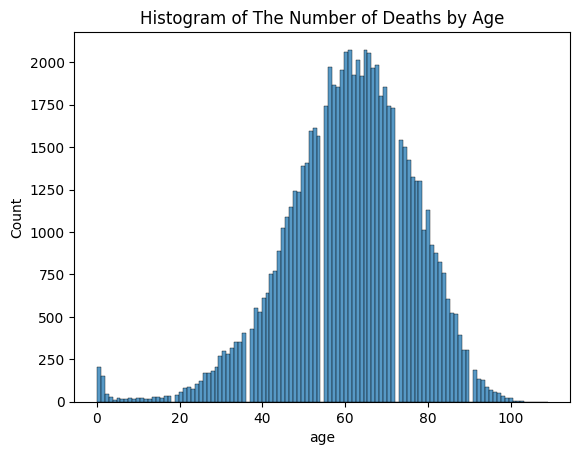

In [55]:
sns.histplot(data=data_died['age'])
plt.title("Histogram of The Number of Deaths by Age")
plt.savefig(fname='plots_png/histogram_number_deaths_age.png', format='png')
plt.show()

In [56]:
df['usmer'].value_counts()

2    658255
1    366897
Name: usmer, dtype: int64

[658255 366897] Int64Index([2, 1], dtype='int64')


<AxesSubplot:xlabel='tobacco', ylabel='Count'>

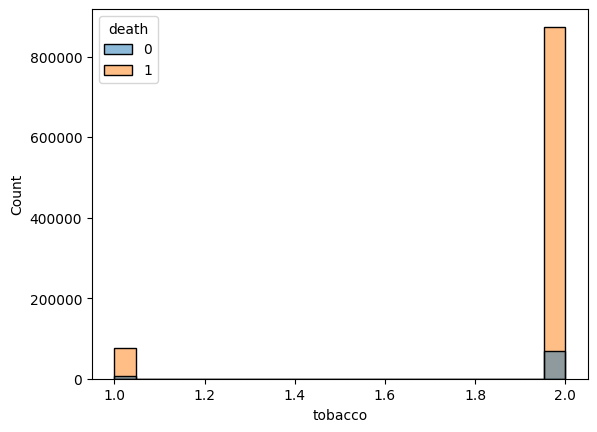

In [57]:
values = df['usmer'].value_counts().values 
labels = df['usmer'].value_counts().index

print(values, labels)

sns.histplot(data=df, x='tobacco', hue='death')


# Getting the statistical description of our dataset

In [58]:
df.describe()

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
count,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06
mean,1.642105e+00,8.993643e+00,1.499376e+00,1.187191e+00,1.865777e+00,4.188778e+01,1.880588e+00,1.985977e+00,1.970251e+00,1.986745e+00,1.844338e+00,1.973535e+00,1.980368e+00,1.846890e+00,1.982099e+00,1.919353e+00,5.291136e+00,9.271191e-01
std,4.793813e-01,3.722439e+00,4.999999e-01,3.900648e-01,3.408919e-01,1.674833e+01,3.242723e-01,1.175868e-01,1.698935e-01,1.143632e-01,3.625346e-01,1.605147e-01,1.387329e-01,3.600937e-01,1.325909e-01,2.722917e-01,1.889586e+00,2.599410e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00


# Checking for Outliers

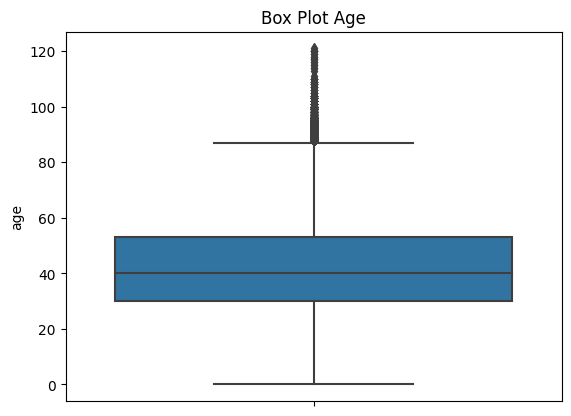

In [59]:
sns.boxplot(y=df["age"])
plt.title('Box Plot Age')
plt.savefig(fname='plots_png/box_plot_age.png', format='png')
plt.show()

In [60]:
len(df[df['age']>=110])

27

In [61]:
#№df = df[df['age']<=100]
#df.shape

# Checking for Correlation between features of our date

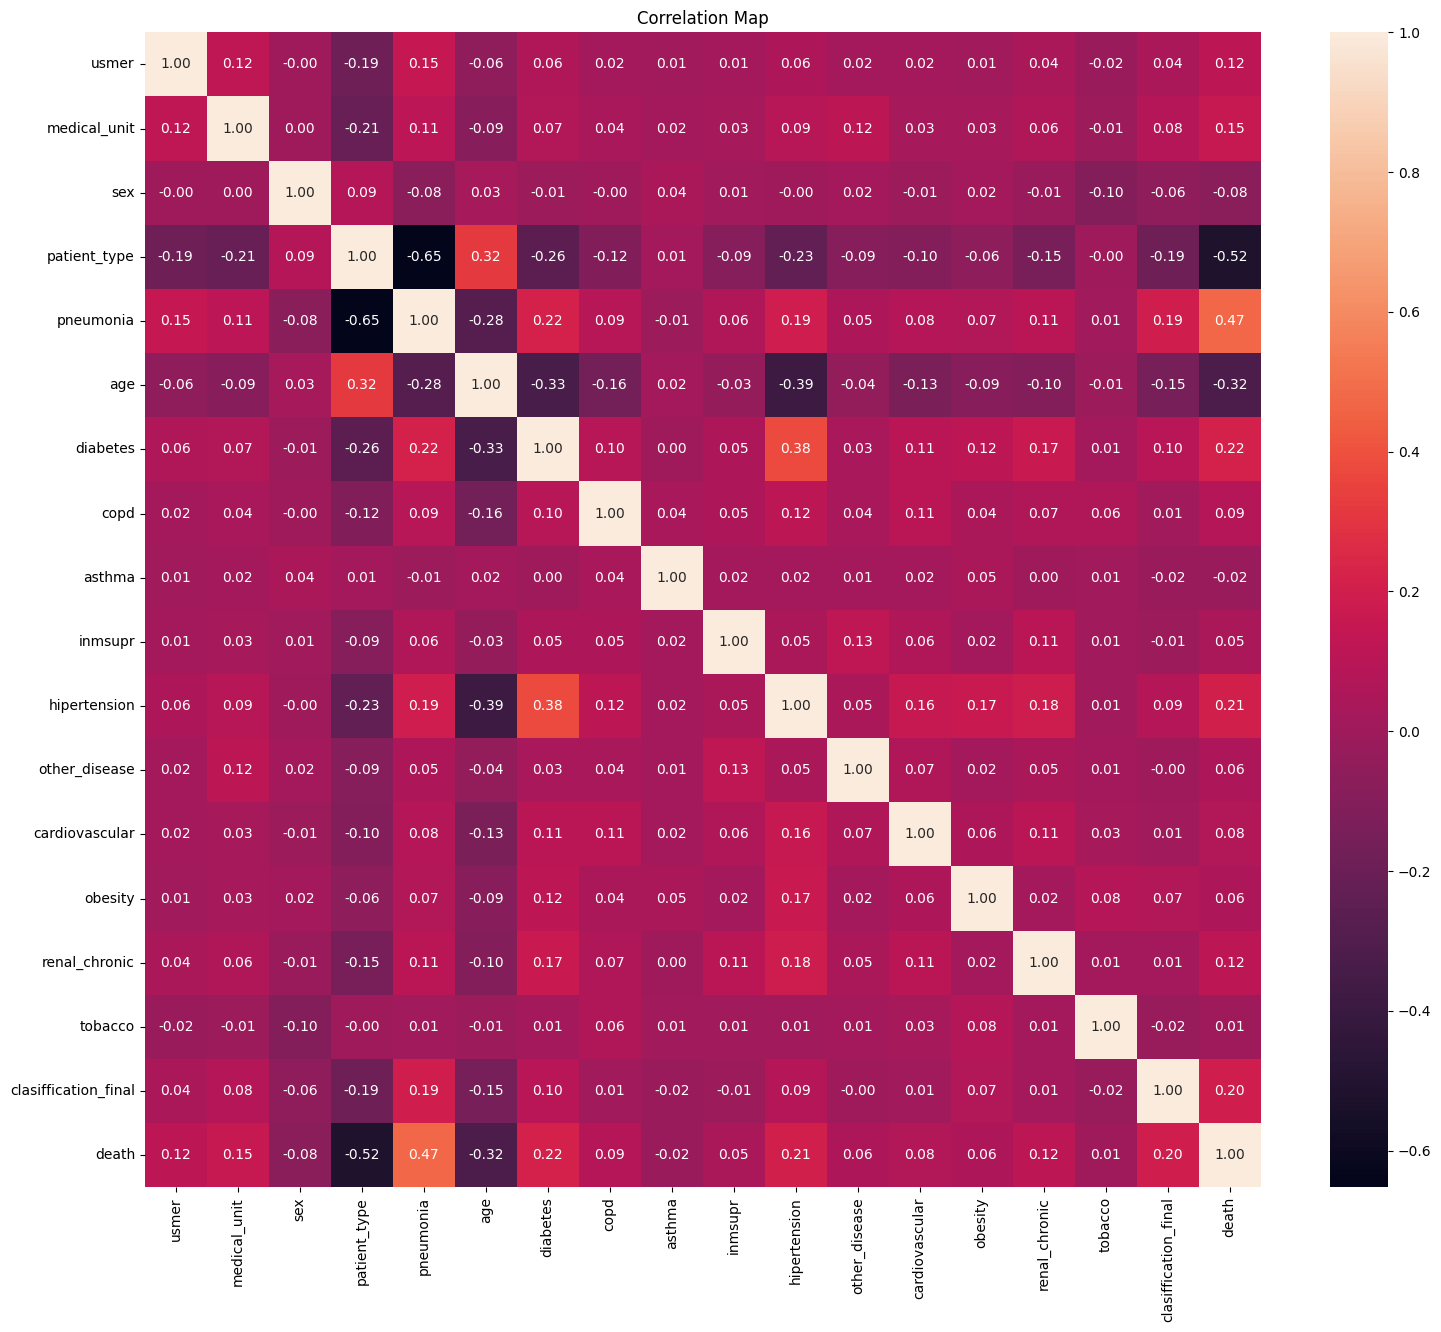

In [62]:
df_corr= df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.title('Correlation Map')
plt.savefig(fname='plots_png/box_plot_age.png', format='png')
plt.show()

# Selecting Features and Target from our Dataset

In [63]:
X = df.drop('death', axis=1)
y = df["death"]

In [64]:
X.head()

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,3


In [65]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: death, Length: 1025152, dtype: int64

# Standardizing the features of our dataset

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Spliting data and choose best model

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [68]:
model = LogisticRegression(solver='liblinear', multi_class='auto', C=1)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model.score(X_test,y_test)

0.9378263234006647

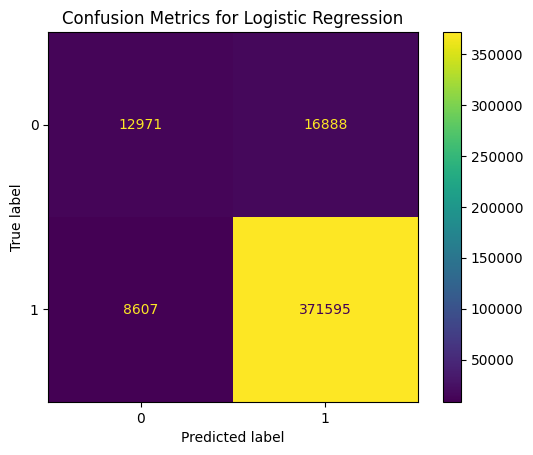

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_metrix = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(conf_metrix).plot()
plt.title('Confusion Metrics for Logistic Regression')
plt.savefig(fname='plots_png/conf_matrix_logist_reg.png', format='png')

In [70]:
from sklearn.metrics import classification_report, roc_curve
print(classification_report(y_test.values, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50     29859
           1       0.96      0.98      0.97    380202

    accuracy                           0.94    410061
   macro avg       0.78      0.71      0.74    410061
weighted avg       0.93      0.94      0.93    410061



# ROC-AUC for Logistic Recression

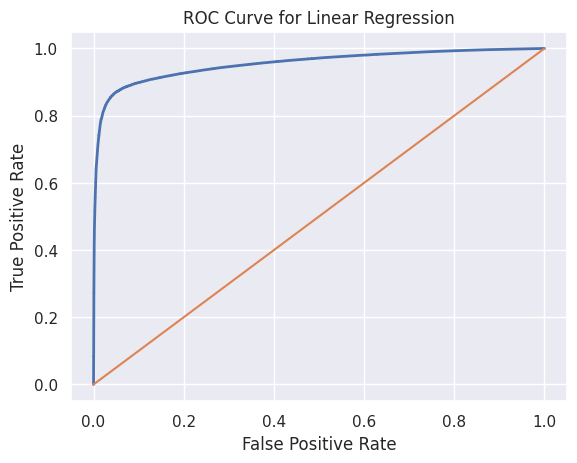

In [71]:
sns.set(font_scale=1)
sns.set_color_codes("muted")
#plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear Regression')
plt.savefig(fname='plots_png/roc_auc_log_reg.png', format='png')

In [72]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_predict_rf = model_rf.predict(X_test)
model_rf.score(X_test,y_test)

0.9340390819902404

In [73]:
print(classification_report(y_test.values, y_predict_rf))

              precision    recall  f1-score   support

           0       0.56      0.47      0.51     29859
           1       0.96      0.97      0.96    380202

    accuracy                           0.93    410061
   macro avg       0.76      0.72      0.74    410061
weighted avg       0.93      0.93      0.93    410061



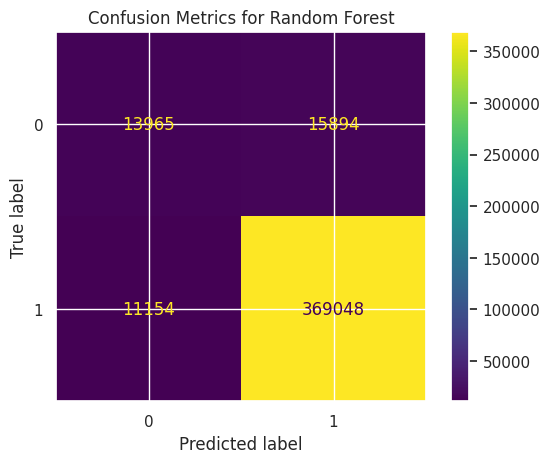

In [74]:
conf_metrix_rf = confusion_matrix(y_test, y_predict_rf)
conf_metrix_rf
cm_display = ConfusionMatrixDisplay(conf_metrix_rf).plot()
plt.title('Confusion Metrics for Random Forest')
plt.savefig(fname='plots_png/conf_matrix_random_forest.png', format='png')

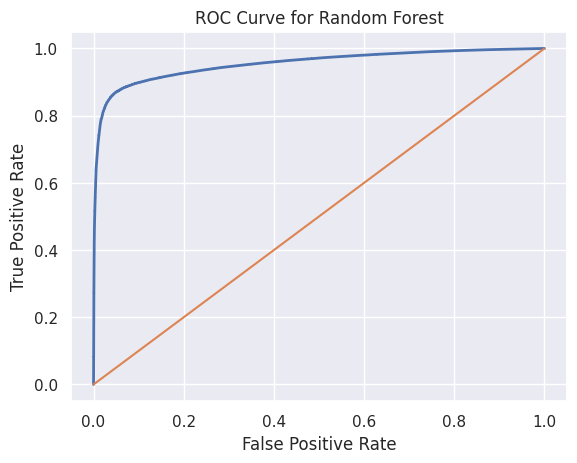

In [75]:
sns.set(font_scale=1)
sns.set_color_codes("muted")
#plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.savefig(fname='plots_png/roc_auc_rand_for.png', format='png')

In [76]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)
metrics.auc(fpr, tpr)

No positive samples in y_true, true positive value should be meaningless


nan

In [77]:
feature_shape_name = df.drop('death', axis=1).columns
len(feature_shape_name)

17

In [78]:
explainer = shap.Explainer(model, X_train, feature_names=feature_shape_name)
shap_values = explainer(X_test)

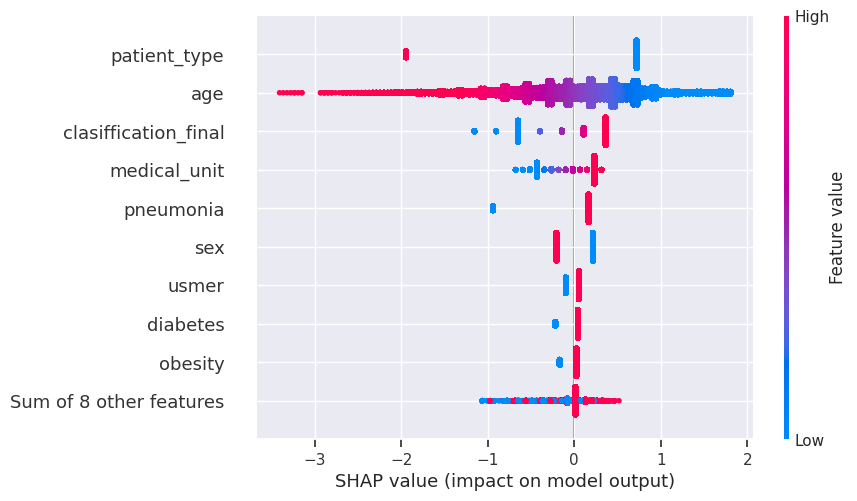

In [79]:
shap.plots.beeswarm(shap_values)

In [93]:
shap.plots.force(shap_values[1392])

In [82]:
df.iloc[104856]

usmer                    1
medical_unit             4
sex                      1
patient_type             1
pneumonia                2
age                     51
diabetes                 1
copd                     2
asthma                   2
inmsupr                  2
hipertension             2
other_disease            2
cardiovascular           2
obesity                  1
renal_chronic            2
tobacco                  2
clasiffication_final     3
death                    1
Name: 105901, dtype: int64

In [99]:
shap.plots.force(shap_values[4])

In [96]:
shap.plots.force(shap_values[1])

In [97]:
shap.plots.force(shap_values[2])

In [90]:
X_analizer.iloc[154]

usmer                   1
medical_unit            2
sex                     2
patient_type            2
pneumonia               1
age                     0
diabetes                2
copd                    2
asthma                  2
inmsupr                 2
hipertension            2
other_disease           2
cardiovascular          1
obesity                 2
renal_chronic           2
tobacco                 2
clasiffication_final    5
death                   0
Name: 155, dtype: int64

In [102]:
X_test[154]












array([-1.33944536, -1.34149826, -0.99875218, -0.47989686,  0.39374086,
       -0.59037464,  0.36824486,  0.11925911,  0.17510249,  0.11589937,
        0.42937109,  0.16487813,  0.14151096,  0.42519509,  0.13500755,
        0.29617727,  0.37514245])

In [88]:
#X_analizer = df.drop('death', axis=1)
X_analizer = df
X_analizer[X_analizer['age']<=25].head(35)

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,3,1
11,2,1,2,2,2,24,2,2,2,2,2,2,2,2,2,2,3,1
15,2,1,1,1,2,23,2,2,2,2,2,2,2,2,2,2,3,1
25,2,1,2,1,2,24,2,2,2,2,2,2,2,2,2,2,3,1
32,2,1,2,1,2,25,2,2,2,2,2,2,2,2,2,2,3,1
36,2,1,1,1,2,20,2,2,2,2,2,2,2,2,2,2,3,1
48,2,1,1,1,2,25,2,2,1,2,2,2,2,2,2,2,7,1
50,2,1,1,1,2,23,2,2,2,2,2,2,2,2,2,2,7,1
53,2,1,2,2,2,16,2,2,2,2,2,2,2,2,2,2,7,1
60,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,7,1


In [101]:
X_analizer[X_analizer['age']>=100]

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
1392,2,3,2,1,1,100,2,2,2,2,1,2,2,2,2,2,3,0
2360,2,3,2,2,1,103,2,2,2,2,2,2,2,2,2,2,3,1
10732,2,3,1,1,2,101,2,2,2,2,2,2,2,2,2,2,6,1
13022,1,3,1,1,2,107,2,2,2,2,2,2,2,2,2,1,7,1
13023,1,3,1,1,2,102,2,2,2,2,2,2,2,2,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042714,1,12,1,1,2,103,2,2,2,2,1,2,2,2,2,2,7,1
1042841,1,12,1,1,2,100,2,1,2,2,1,2,2,2,2,2,7,1
1044419,2,12,2,1,2,104,2,2,2,2,2,2,2,2,2,2,7,1
1045350,2,12,1,1,2,104,2,2,2,2,2,2,2,2,2,2,7,1


In [82]:
df[df.index==1392]

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,death
1392,2,3,2,1,1,100,2,2,2,2,1,2,2,2,2,2,3,0


In [83]:
X_analizer = df.drop('death', axis=1)
X_analizer[X_analizer['age']>=100].head()

,usmer,medical_unit,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
1392,2,3,2,1,1,100,2,2,2,2,1,2,2,2,2,2,3
2360,2,3,2,2,1,103,2,2,2,2,2,2,2,2,2,2,3
10732,2,3,1,1,2,101,2,2,2,2,2,2,2,2,2,2,6
13022,1,3,1,1,2,107,2,2,2,2,2,2,2,2,2,1,7
13023,1,3,1,1,2,102,2,2,2,2,2,2,2,2,2,2,7


In [85]:
model_params = {
    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5,10],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(n_estimators=10),
        'params': {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [5, 10, 20, 40],
            'max_depth': [2, 4, 6, 10],
            'max_leaf_nodes': [2, 4, 6, 8, 10]
        }
    },
}

In [86]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df_hyper_param = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df_hyper_param)

KeyboardInterrupt: 

In [283]:
print(df_hyper_param[1])

KeyError: 1

# Conclusion
### The XGBoost Model by means of the accuracy on the validation data and its classification report is the best model.

# THANK YOU FOR YOUR TIME!